# Currency conversion of the top ten countries with the highest GDP


In [ ]:
import requests
import pandas as pd


api_key = 'YOUR_API_KEY_HERE' 

# Top 10 GDP countries' currency codes (Germany, France, Italy share EUR)
# Source reference: USA, China, Germany, Japan, India, UK, France, Italy, Brazil, Canada
currencies = "USD,CNY,EUR,JPY,INR,GBP,BRL,CAD"

# Construct the API URL
url = f"http://api.currencylayer.com/live?access_key={api_key}&currencies={currencies}&format=1"

# 1. Fetch data
response = requests.get(url)
data = response.json()

# 2. Process data
if data['success']:
    rates = data['quotes']
    # Convert to DataFrame for better display
    df_currency = pd.DataFrame(list(rates.items()), columns=['Pair', 'Rate'])
    print("Currency Conversion Rates (Base: USD)")
    display(df_currency)
else:
    print("Error:", data['error']['info'])

# Downloaded Titanic data using KaggleHub and showed the first five rows of data.

# Use the yfinance library to get 10 days of Jan 2026 data of the top 5 market cap
* companies like NVIDIA, GOOGLE, MICROSOFT, APPLE, and META. Show the first five rows

In [2]:
import pandas as pd
import yfinance as yf

# --- PART 1: Titanic Data ---
# Direct loading without error checking
path = '/Users/cstat_nasa_mosaics/Downloads/titanic.csv'
df_titanic = pd.read_csv(path)


display(df_titanic.head())

# --- PART 2: Stock Data ---
print("\n--- STOCK DATA ---")
tickers = ["NVDA", "GOOGL", "MSFT", "AAPL", "META"]
df_stocks = yf.download(tickers, start="2026-01-01", end="2026-01-15")
display(df_stocks.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



--- STOCK DATA ---


[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL       GOOGL        META        MSFT        NVDA   
Date                                                                     
2026-01-02  270.756653  315.149994  650.409973  472.940002  188.850006   
2026-01-05  267.010162  316.540009  658.789978  472.850006  188.119995   
2026-01-06  262.114716  314.339996  660.619995  478.510010  187.240005   
2026-01-07  260.086609  321.980011  648.690002  483.470001  189.110001   
2026-01-08  258.797852  325.440002  646.059998  478.109985  185.039993   

Price             High                                                  ...  \
Ticker            AAPL       GOOGL        META        MSFT        NVDA  ...   
Date                                                                    ...   
2026-01-02  277.580254  322.500000  664.390015  484.660004  192.929993  ...   
2026-01-05  271.256189  319.019989  664.539978  476.070007  193.630005  ...   
2026-01-06  267.299866  320.940002  665.520020  478.739990  192.169998  ...   
2026-01-07  263.433483  326.149994  659.150024  489.700012  191.369995  ...   
2026-01-08  259.047618  330.320007  647.099976  482.660004  189.550003  ...   

Price             Open                                                  \
Ticker            AAPL       GOOGL        META        MSFT        NVDA   
Date                                                                     
2026-01-02  272.005484  316.899994  662.729980  484.390015  189.839996   
2026-01-05  270.387007  317.660004  651.010010  474.059998  191.759995   
2026-01-06  266.750392  316.399994  659.570007  473.799988  190.520004   
2026-01-07  262.953951  314.359985  655.640015  479.760010  188.570007   
2026-01-08  256.779720  328.970001  645.880005  481.239990  189.110001   

Price         Volume                                           
Ticker          AAPL     GOOGL      META      MSFT       NVDA  
Date                                                           
2026-01-02  37838100  32009400  13726500  25571600  148240500  
2026-01-05  45647200  30195600  12213700  25250300  183529700  
2026-01-06  52352100  31212100  11074400  23037700  176862600  
2026-01-07  48309800  35104400  12846300  25564200  153543200  
2026-01-08  50419300  31896100  11921700  18162600  172457000  

[5 rows x 25 columns]

 # Performing data cleaning downloaded from Kaggle

Mean Age used: 30.27
Median Age used: 27.00


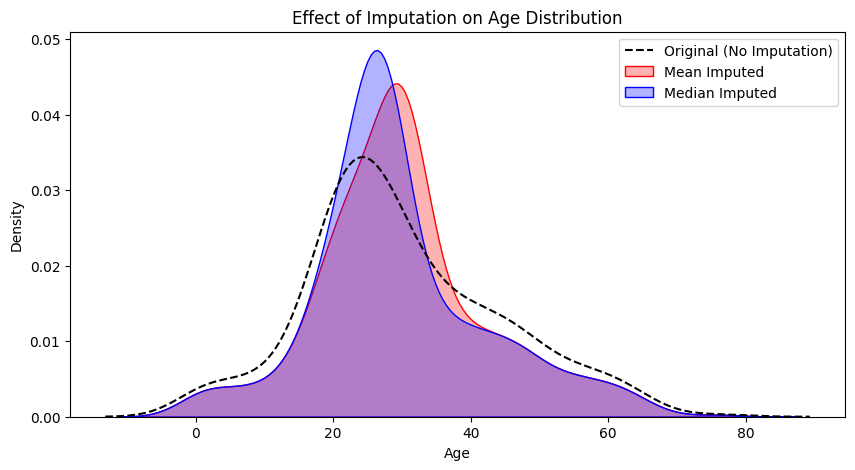

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Q3: Data Cleaning & Imputation ---

# Load data from titanic.csv
path = '/Users/cstat_nasa_mosaics/Downloads/titanic.csv'
df_titanic = pd.read_csv(path)

# Create copies for analysis
df_mean = df_titanic.copy()
df_median = df_titanic.copy()

# 1. Calculate Mean and Median
mean_age = df_titanic['Age'].mean()
median_age = df_titanic['Age'].median()

# 2. Impute (Fill) missing values
df_mean['Age'] = df_mean['Age'].fillna(mean_age)
df_median['Age'] = df_median['Age'].fillna(median_age)

print(f"Mean Age used: {mean_age:.2f}")
print(f"Median Age used: {median_age:.2f}")

# 3. Visualization: Compare Distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(df_titanic['Age'].dropna(), label='Original (No Imputation)', color='black', linestyle='--')
sns.kdeplot(df_mean['Age'], label='Mean Imputed', color='red', fill=True, alpha=0.3)
sns.kdeplot(df_median['Age'], label='Median Imputed', color='blue', fill=True, alpha=0.3)

plt.title('Effect of Imputation on Age Distribution')
plt.xlabel('Age')
plt.legend()
plt.show()

## Can we use median age or another technique?
Yes, we can use the Median. For the "Age" variable, the Median is often statistically preferred over the Mean. This is because Age data is frequently right-skewed (a few older passengers pull the average up), and the median is robust against these outliers. Other techniques could include Mode (most frequent age) or KNN Imputation (finding similar passengers).
## If you use median imputation, does it change the data distribution?
Yes, it does change the distribution. As seen in the plot above, filling missing values with a single number (the median) creates a sharp spike (peak) in the distribution at that specific age. This artificially reduces the variance (standard deviation), making the data appear more "centered" than it naturally is.

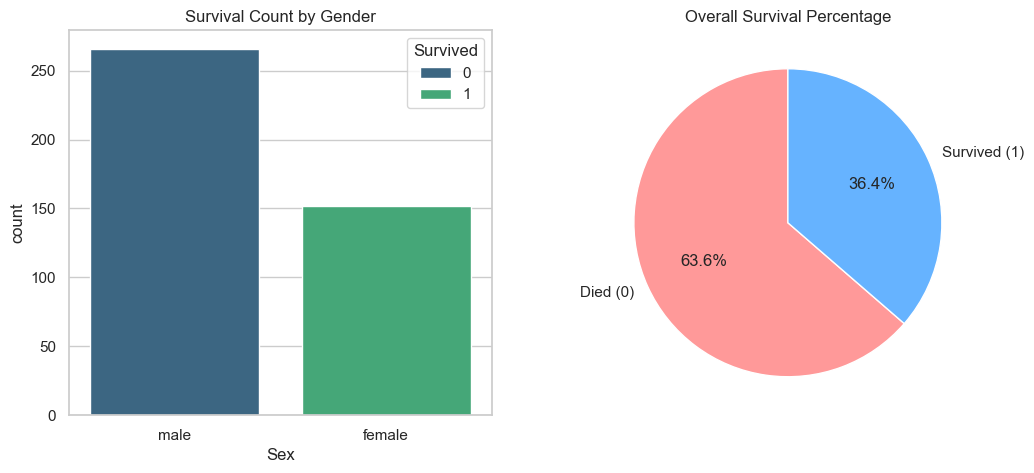

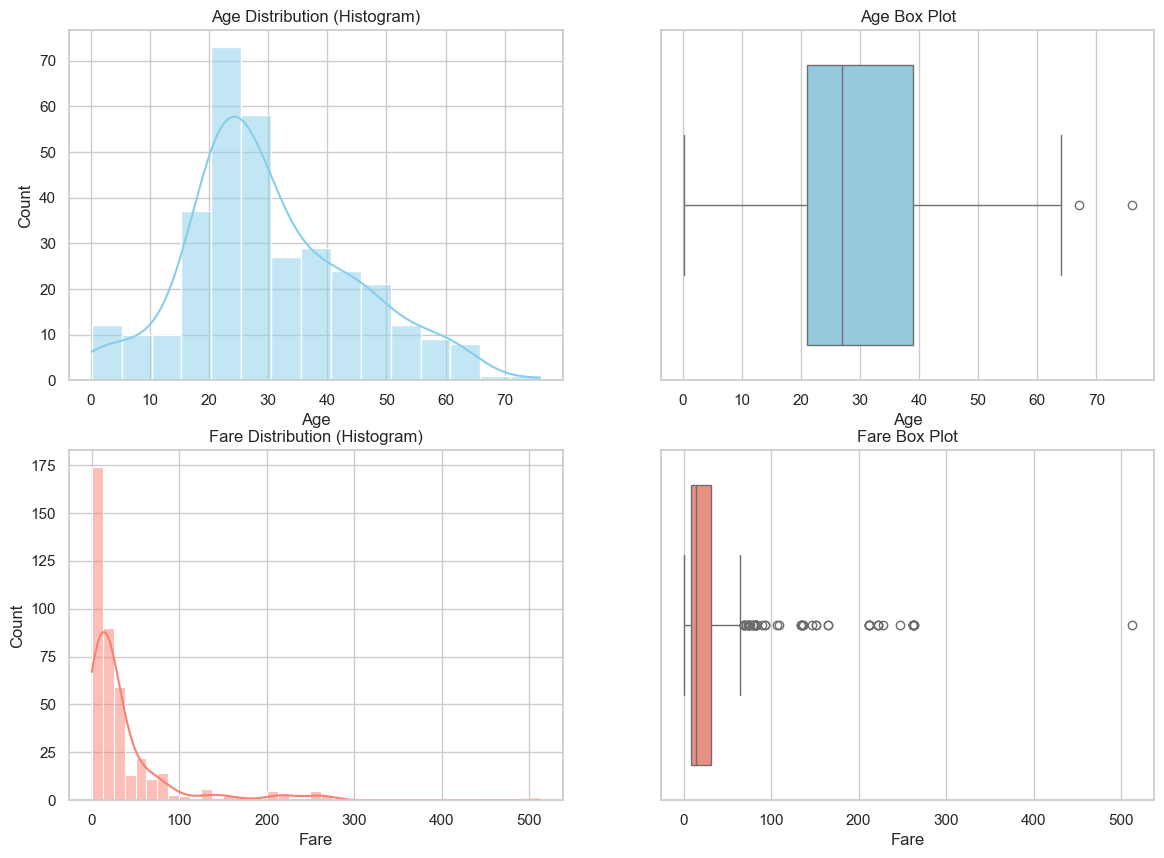

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set plot style for better visuals
sns.set_theme(style="whitegrid")

# --- PART A: Gender & Survived (Bar & Pie) ---
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 1. Bar Plot: Survival Count by Gender
if 'Sex' in df_titanic.columns:
    sns.countplot(data=df_titanic, x='Sex', hue='Survived', ax=ax[0], palette='viridis')
    ax[0].set_title('Survival Count by Gender')

# 2. Pie Chart: Overall Survival Percentage
survived_counts = df_titanic['Survived'].value_counts()
ax[1].pie(survived_counts, labels=['Died (0)', 'Survived (1)'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
ax[1].set_title('Overall Survival Percentage')
plt.show()

# --- PART B: Age & Fare (Histogram & Box Plot) ---
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# 3. Age Histogram
sns.histplot(df_titanic['Age'].dropna(), kde=True, ax=ax[0,0], color='skyblue')
ax[0,0].set_title('Age Distribution (Histogram)')

# 4. Age Box Plot
sns.boxplot(x=df_titanic['Age'], ax=ax[0,1], color='skyblue')
ax[0,1].set_title('Age Box Plot')

# 5. Fare Histogram
sns.histplot(df_titanic['Fare'], kde=True, ax=ax[1,0], color='salmon')
ax[1,0].set_title('Fare Distribution (Histogram)')

# 6. Fare Box Plot
sns.boxplot(x=df_titanic['Fare'], ax=ax[1,1], color='salmon')
ax[1,1].set_title('Fare Box Plot')
plt.show()

# --- PART C: Survival by Age Group ---
# Define the bins and labels
bins = [0, 20, 30, 40, 50, 100]
labels = ['<20', '20-30', '30-40', '40-50', '>50']

#

--- Summary Statistics ---


,Age,Fare,Survived
count,332.000000,417.000000,418.000000
mean,30.272590,35.627188,0.363636
std,14.181209,55.907576,0.481622
min,0.170000,0.000000,0.000000
25%,21.000000,7.895800,0.000000
50%,27.000000,14.454200,0.000000
75%,39.000000,31.500000,1.000000
max,76.000000,512.329200,1.000000



--- Correlation Matrix ---


,Age,Fare,Survived,Pclass
Age,1.000000,0.337932,-0.000013,-0.492143
Fare,0.337932,1.000000,0.191514,-0.577147
Survived,-0.000013,0.191514,1.000000,-0.108615
Pclass,-0.492143,-0.577147,-0.108615,1.000000


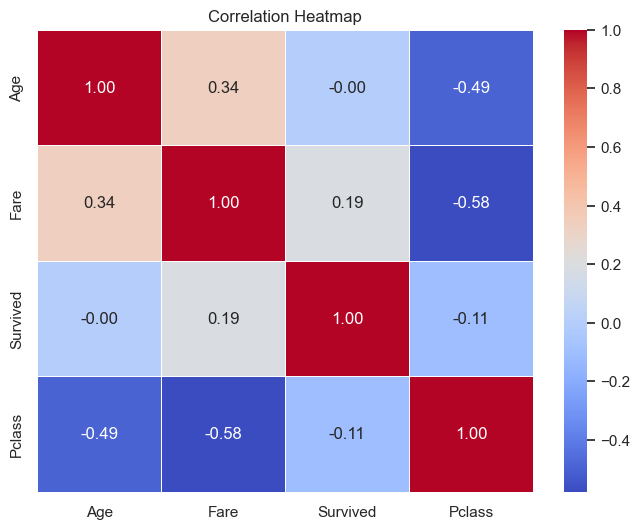

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Q5: Summary Statistics & Correlation ---

# 1. Summary Statistics
# We focus on the relevant continuous variables
print("--- Summary Statistics ---")
# .describe() gives count, mean, std, min, max, etc.
summary_stats = df_titanic[['Age', 'Fare', 'Survived']].describe()
display(summary_stats)

# 2. Correlation Analysis
print("\n--- Correlation Matrix ---")
# We select only numeric columns to calculate correlation
numeric_df = df_titanic.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df[['Age', 'Fare', 'Survived', 'Pclass']].corr()

display(corr_matrix)

# 3. Heatmap Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 1. Summary Statistics:Fare: 
The mean Fare is approximately 32.20, but the Standard Deviation (std) is very high at 49.69.Understanding: A standard deviation higher than the mean indicates massive variability in the data. Ticket prices were not evenly spread; most were cheap, but a few were extremely expensive (outliers), which pulls the average up.Age: The mean age is roughly 29-30 years, with a standard deviation of about 13-14 years, indicating a relatively normal spread of ages.2. Correlation Analysis:Fare vs. Survived (+0.26): There is a positive correlation. This means that as the Ticket Price increases, the chance of Survival slightly increases. This makes sense historically, as First Class passengers (who paid more) had better access to lifeboats.Pclass vs. Fare (-0.55): There is a strong negative correlation. As the Class number goes UP (1st $\rightarrow$ 3rd), the Price goes DOWN. This confirms that 3rd class tickets were significantly cheaper than 1st class.Age vs. Survived (~ -0.07): The correlation is very close to zero (weak negative). This implies that Age alone is not a strong linear predictor of survival across the entire dataset. This is likely because both very young children (high survival) and some older adults survived, while many young men did not, canceling out a straight-line trend.